In [1]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
#pip install matplotlib-venn
from matplotlib_venn import venn2

# I] user-defined variables

In [3]:
# #Kevin
# from google.colab import drive
# drive.mount('/content/drive')
# input_file_directory = "/content/drive/MyDrive/Colab Notebooks/ATG7 xena iso  tpm/to_import/"

In [4]:
#Adrian 
input_file_directory = '/home/adrian/projects/ATG7/data/'

## functions & options


In [5]:
#define a function to split after the ".". The 1 is for how many word to have. if we have several dot. The [1] is what is after the dot, and [0] what is before
def split(L):
  return L.split(".",1)[0]

# II] Dataframe settings

## A) Isoform data

In [6]:
# Original data isoforms
directory = input_file_directory + "xena_surv_ATG7.tsv"
df_ori= pandas.read_csv(directory, sep = "\t")


In [7]:
# Column selection
df= df_ori[['sample',
            '_sample_type',
            '_primary_site',
            'ENSG00000197548.12',
            'ENST00000354449.7', 
            'ENST00000354956.9',
            'ENST00000446450.6']]

# We have Adrenal Gland and Adrenal gland. I need to put "G".
df['_primary_site'] = df['_primary_site'].str.title()

# Column rename
df.rename(columns = {'sample' : 'sample',
    '_sample_type' : 'Sample_Type', 
                            '_primary_site' : 'Primary_Site', 
                            'ENST00000354449.7': 'ATG7_1',
                            'ENST00000354956.9': 'ATG7_2',
                            'ENST00000446450.6': 'ATG7_3',
                            'ENSG00000197548.12': 'ATG7'}, inplace = True)

# Calcul to have value from log2;  2**(ATG7(1))-0.001
df["ATG7(total)"] = pow(2,df['ATG7'])-0.001
df["ATG7(1)"] = pow(2,df['ATG7_1'])-0.001
df["ATG7(2)"] = pow(2,df['ATG7_2'])-0.001
df["ATG7(3)"] = pow(2,df['ATG7_3'])-0.001

# Calcul to have log2+1 from value; 
df["log2_+1_ATG7(total)"] = numpy.log2(df['ATG7(total)']+1)
df["log2_+1_ATG7(1)"] = numpy.log2(df['ATG7(1)']+1)
df["log2_+1_ATG7(2)"] = numpy.log2(df['ATG7(2)']+1)

# Calcul to see percentage of expression of the 3 isoforms of ATG7
df['ATG7_prot_tot'] = (df['ATG7(1)'] + df['ATG7(2)'] + df['ATG7(3)'])
df['ATG7_1%'] = (df['ATG7(1)'] *100)/ df['ATG7_prot_tot']
df['ATG7_2%'] = (df['ATG7(2)'] *100)/ df['ATG7_prot_tot']
df['ATG7_3%'] = (df['ATG7(3)'] *100)/ df['ATG7_prot_tot']

#Add columns, normalized on total
df["ATG7(1)norm"] = df['ATG7(1)']/df["ATG7(total)"]
df["ATG7(2)norm"] = df['ATG7(2)']/df["ATG7(total)"]
df.head()

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/adrian/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7(total),ATG7(1),ATG7(2),ATG7(3),log2_+1_ATG7(total),log2_+1_ATG7(1),log2_+1_ATG7(2),ATG7_prot_tot,ATG7_1%,ATG7_2%,ATG7_3%,ATG7(1)norm,ATG7(2)norm
0,TARGET-20-PARUBT-40,Recurrent Blood Derived Cancer - Peripheral Blood,White Blood Cell,4.401,1.3900,1.522,-1.7320,21.125765,2.619787,2.870889,3.000343e-01,4.467655,1.855905,1.952665,5.790710,45.241201,49.577495,5.181305,0.124009,0.135895
1,TARGET-20-PATJHJ-40,Recurrent Blood Derived Cancer - Peripheral Blood,White Blood Cell,2.820,1.1180,-1.086,-9.9660,7.060624,2.169459,0.470066,-1.495113e-07,3.010892,1.664236,0.555881,2.639524,82.191280,17.808726,-0.000006,0.307262,0.066576
2,TARGET-10-PASLZM-40,Recurrent Blood Derived Cancer - Peripheral Blood,White Blood Cell,1.158,0.0158,-3.171,-3.8160,2.230479,1.010012,0.110028,7.000183e-02,1.691748,1.007204,0.150597,1.190042,84.871949,9.245753,5.882299,0.452823,0.049329
3,TARGET-21-PATAIJ-42,Post treatment Blood Cancer - Blood,White Blood Cell,4.332,1.3450,1.975,-9.9660,20.139115,2.539302,3.930282,-1.495113e-07,4.401843,1.823465,2.301670,6.469584,39.249848,60.750154,-0.000002,0.126088,0.195157
4,TARGET-21-PASVJS-41,Post treatment Blood Cancer - Bone Marrow,White Blood Cell,5.156,1.8040,3.769,0.5069,35.653197,3.490870,13.631706,1.419994e+00,5.195867,2.166995,3.871026,18.542569,18.826249,73.515731,7.658019,0.097912,0.382342


In [8]:
df['Sample_Type'].value_counts()

Primary Tumor                                        9185
Normal Tissue                                        7429
Solid Tissue Normal                                   738
Cell Line                                             433
Metastatic                                            393
Primary Solid Tumor                                   286
Primary Blood Derived Cancer - Peripheral Blood       239
Primary Blood Derived Cancer - Bone Marrow            237
Recurrent Blood Derived Cancer - Bone Marrow          104
Recurrent Tumor                                        45
Recurrent Solid Tumor                                  13
Post treatment Blood Cancer - Bone Marrow              12
Additional - New Primary                               11
Recurrent Blood Derived Cancer - Peripheral Blood       3
Post treatment Blood Cancer - Blood                     1
Control Analyte                                         1
Additional Metastatic                                   1
Name: Sample_T

In [9]:
#Creation of two tables, Normal tissue and Primary tumor.
df_ATG7_Normal = df[df['Sample_Type'].str.match ('Normal Tissue')]
df_ATG7_Primary = df[df['Sample_Type'].str.match ('Primary Tumor')]

print('normal_tissue' , len(df_ATG7_Normal))
print('primary_tumors' , len(df_ATG7_Primary))

normal_tissue 7429
primary_tumors 9185


In [10]:
# df with only Normal and Primary 
df_Norm_Prim = pandas.concat([df_ATG7_Normal, df_ATG7_Primary], axis=0)
df_Norm_Prim.reset_index(drop=True, inplace=True)

### High/Low expression per Median for Isoform expression

In [11]:
# What is the median for iso 1 and iso 2?
#High >50% and low <50%

In [12]:
Data = [[df_ATG7_Normal, 'Normal'], [df_ATG7_Primary, 'Primary']]
isoforms = [["ATG7_1", "iso1"], ["ATG7_2", "iso2"]]

df_LoHi = [] 

for df in Data:
  for isoform in isoforms:
    xMed = df[0][isoform[0]].median()

    low = df[0].loc[df[0][isoform[0]] < xMed]
    low['L/H'] = "Low_"+isoform[1]

    high = df[0].loc[df[0][isoform[0]] > xMed]
    high['L/H'] = "High_"+isoform[1]

  #merge low and high
  concat = pandas.concat([low, high], axis=0)
  col = concat.pop('L/H')
  concat.insert(3, 'L/H', col)
  df_LoHi.append(concat)

normal_LoHi = df_LoHi[0]
primary_LoHi = df_LoHi[1]

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## B) Whole gene expression

In [13]:
#Import list of protein coding transcripts
protein_coding_directory = input_file_directory + "protein_coding_list.txt"
protein_coding_list= pandas.read_csv(protein_coding_directory, sep = "\t")
print(len(protein_coding_list))
protein_coding_list.head(2)

22796


,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
1,ENSG00000198888,MT-ND1,4535.0,protein_coding
2,ENSG00000198763,MT-ND2,4536.0,protein_coding


In [14]:
## Kevin
# directory = input_file_directory + "normal_tissue_expression_1e3s_allg.tsv"
# df_gexpr_normal = pandas.read_csv(directory, sep = "\t")

# directory = input_file_directory + "primary_tumors_expression_1e3s_allg.tsv"
# df_gexpr_primary = pandas.read_csv(directory, sep = "\t")


In [15]:
%%time
#DL original data, whole gene expression
normal_tissue_expression_file = '/home/adrian/projects/ATG7/results/normal_tissue_expression.tsv'
primary_tumor_expression_file = '/home/adrian/projects/ATG7/results/primary_tumors_expression.tsv'

#Normal tissue
df_gexpr_normal= pandas.read_csv(normal_tissue_expression_file, sep = "\t")

#Primary Tumors
df_gexpr_primary= pandas.read_csv(primary_tumor_expression_file, sep = "\t")


CPU times: user 2min 29s, sys: 4.26 s, total: 2min 33s
Wall time: 2min 33s


In [16]:
df_gexpr_normal.head(2)

,sample,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2826-SM-5GZXL,...,GTEX-ZZPU-0726-SM-5N9C8,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
0,ENSG00000242268.2,-9.9658,-9.9658,-9.9658,-1.2481,-3.8160,-1.7809,-9.9658,-9.9658,-3.6259,...,-0.8084,-9.9658,-9.9658,-9.9658,-4.0350,-9.9658,-9.9658,-9.9658,-9.9658,-3.6259
1,ENSG00000259041.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658


In [17]:
#see how many duplicates in genes
print('normal shape:', df_gexpr_normal.shape)
print('number of duplicated genes:', df_gexpr_normal.duplicated('sample').sum())
print()
print('primary shape is:', df_gexpr_primary.shape)
print('number of duplicated genes:', df_gexpr_primary.duplicated('sample').sum())

normal shape: (60498, 7430)
number of duplicated genes: 0

primary shape is: (60498, 9186)
number of duplicated genes: 0


In [18]:
#Preparation protein coding gene expression
#remove dot in ENSEMBL name. Function split created at the beginning
data = [df_gexpr_normal, df_gexpr_primary]

df_protcoding_exp = []
for df in data: 
  #remove dot in ens name
  df["sample"] = df["sample"].apply(split)
  #see if have duplicate
  print('number of duplicated genes:', df.duplicated('sample').sum())
  
  #Merge with prot coding list
  df.rename(columns = {'sample' : 'ensembl_gene_id'}, inplace = True)
  dfmerged = protein_coding_list.merge(df)
  df_protcoding_exp.append(dfmerged)

normal_protcoding = df_protcoding_exp[0]
primary_protcoding = df_protcoding_exp[1]

number of duplicated genes: 0
number of duplicated genes: 0


In [19]:
#Control of the merge. See value of ENSG00000198712 before merging
df.loc[df['ensembl_gene_id'] == 'ENSG00000198712']

,ensembl_gene_id,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-04-1331-01,TCGA-04-1332-01,TCGA-04-1337-01,TCGA-04-1338-01,TCGA-04-1341-01,...,TCGA-ZP-A9D4-01,TCGA-ZQ-A9CR-01,TCGA-ZR-A9CJ-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CG-01,TCGA-ZT-A8OM-01,TCGA-ZU-A8S4-01,TCGA-ZX-AA5X-01
28551,ENSG00000198712,13.5251,12.3893,13.4086,11.6139,14.2857,11.9431,14.3388,14.1084,12.9949,...,14.7449,14.156,13.2731,13.605,13.0069,13.9678,14.3166,11.0066,12.9042,14.5414


In [20]:
#Control of the merge. See value of ENSG00000198712 after merging. have to be the same
dfmerged.loc[dfmerged['ensembl_gene_id'] == 'ENSG00000198712']

,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-04-1331-01,TCGA-04-1332-01,...,TCGA-ZP-A9D4-01,TCGA-ZQ-A9CR-01,TCGA-ZR-A9CJ-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CG-01,TCGA-ZT-A8OM-01,TCGA-ZU-A8S4-01,TCGA-ZX-AA5X-01
3,ENSG00000198712,MT-CO2,4513.0,protein_coding,13.5251,12.3893,13.4086,11.6139,14.2857,11.9431,...,14.7449,14.156,13.2731,13.605,13.0069,13.9678,14.3166,11.0066,12.9042,14.5414


In [21]:
#see how many duplicates in genes
print('normal shape:', normal_protcoding.shape)
print('number of duplicate:',normal_protcoding.duplicated('ensembl_gene_id').sum())
print()
print('primary shape is:', primary_protcoding.shape)
print('number of duplicate:',primary_protcoding.duplicated('ensembl_gene_id').sum())
print()
print("I DO NOT KNOW WHERE DUPICATE COME FROM ?")
print("I DO NOT KNOW WHERE DUPICATE COME FROM ?")
print("I DO NOT KNOW WHERE DUPICATE COME FROM ?")
print("there were ZERO duplicate before the merge, and I know my merge is correct")

normal shape: (19536, 7433)
number of duplicate: 154

primary shape is: (19536, 9189)
number of duplicate: 154

I DO NOT KNOW WHERE DUPICATE COME FROM ?
I DO NOT KNOW WHERE DUPICATE COME FROM ?
I DO NOT KNOW WHERE DUPICATE COME FROM ?
there were ZERO duplicate before the merge, and I know my merge is correct


In [22]:
#delete duplicates
normal_protcoding.drop_duplicates(subset = "ensembl_gene_id", inplace = True)
primary_protcoding.drop_duplicates(subset = "ensembl_gene_id", inplace = True)

#see how many duplicates in genes
print('normal shape:', normal_protcoding.shape)
print('number of duplicate:', normal_protcoding.duplicated('ensembl_gene_id').sum())
print()
print('primary shape is:', primary_protcoding.shape)
print('number of duplicate:', primary_protcoding.duplicated('ensembl_gene_id').sum())

normal shape: (19382, 7433)
number of duplicate: 0

primary shape is: (19382, 9189)
number of duplicate: 0


In [23]:
%%time 
#Preparation of the global dataframe
data = [[normal_protcoding, df_ATG7_Normal], [primary_protcoding, df_ATG7_Primary]]

df_final = []

for df in data:
  
  #transpose the table 
  protcoding_df = df[0].copy()
  protcoding_df = numpy.transpose(protcoding_df)

  #Change head column & delete the name of the column index; choose ENSEMBL
  protcoding_df.columns = protcoding_df.iloc[0]
  protcoding_df.columns.name = None
  protcoding_df = protcoding_df.reset_index()

  #Delete the first rows & columns rename to merge
  protcoding_df = protcoding_df.drop(protcoding_df.index[0:4])
  protcoding_df.rename(columns = {'index' : 'sample'}, inplace = True)
  
  #Merge the two df to have isoform expression + whole gene expression 
  df_merged = pandas.merge(df[1], protcoding_df, on= 'sample')

  #delete the sample column and select column
  df_merged = df_merged.drop("sample", 1)
  df_merged = df_merged.drop(df_merged.columns[5:19], axis=1)
  
  #save in list
  df_final.append(df_merged)

normal_protcoding_atg7_expr = df_final[0]
primary_protcoding_atg7_expr = df_final[1]

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


# III] ATG7 expression

##A) Distribution


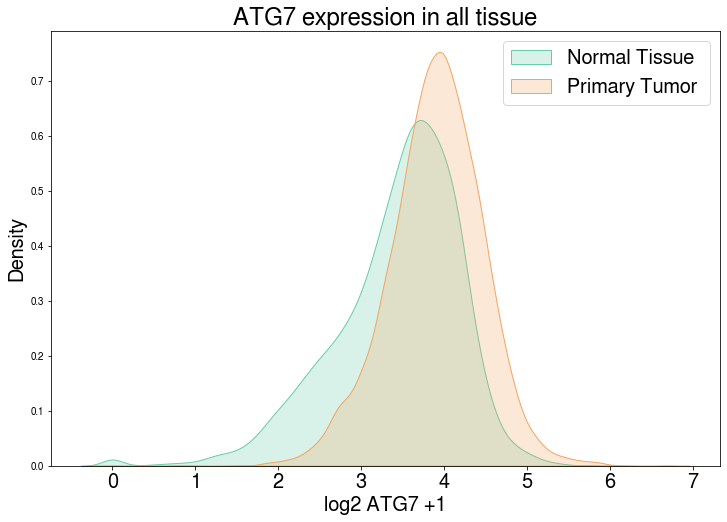

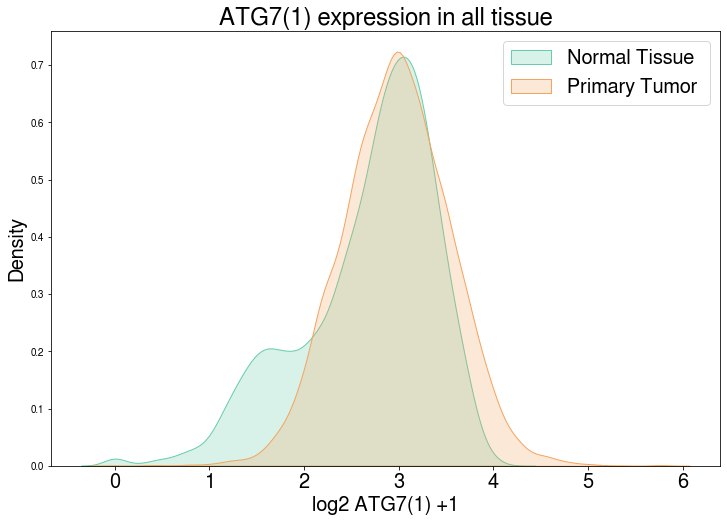

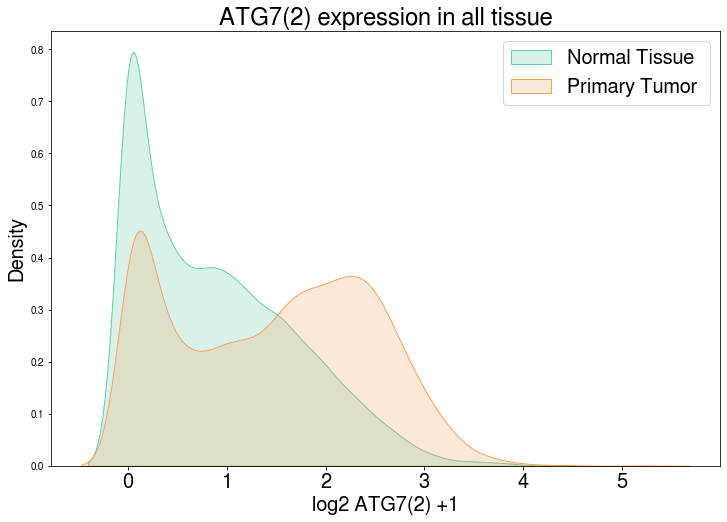

<Figure size 864x576 with 0 Axes>

In [24]:
# Distribution graph, for ATG7, iso1 & iso2

all_dfs = [[df_ATG7_Normal, 'in all tissue', df_ATG7_Primary, 'all primary tumors']]

isoforms = [['log2_+1_ATG7(total)', 'ATG7'], ['log2_+1_ATG7(1)', 'ATG7(1)'], ['log2_+1_ATG7(2)', 'ATG7(2)']]


for df in all_dfs:
  for isoform in isoforms:
    xData = df[0][isoform[0]]
    x2Data = df[2][isoform[0]]

    seaborn.kdeplot(xData, color = 'mediumaquamarine', fill = True)
    seaborn.kdeplot(x2Data, color = 'sandybrown', fill = True)

    plt.xlabel('log2 '+ isoform[1]+ ' +1')
    plt.title(isoform[1]+ ' expression ' + df[1] )
    plt.legend(labels=["Normal Tissue","Primary Tumor "])
    plt.show()
    plt.clf()

##B) Percentage do not express ATG7 isoforms

In [25]:
#Percentage of patients: 

all_dfs = [[df_ATG7_Normal, 'all normal tissue'], [df_ATG7_Primary, 'all primary tumor']]

isoforms = [['ATG7(total)', 'ATG7'], ['ATG7(1)', 'ATG7(1)'], ['ATG7(2)', 'ATG7(2)'], ['ATG7(3)', 'ATG7(3)']]

for df in all_dfs:
  print(df[1])
  for isoform in isoforms:
        
    QUOI = isoform[1]
    OU = df[1]
    all = (df[0][isoform[0]]).shape
    no_exp = (df[0][isoform[0]]<0.1).sum()
    perc_no_exp = (no_exp*100)/all
    perc_no_exp = float(perc_no_exp)

    # print("The percentage of patient who do not express", QUOI, OU, "is:", round(perc_no_exp,1),'%')
    print(round(perc_no_exp,1),'% of tumor do not express', QUOI)
  print()


all normal tissue
0.4 % of tumor do not express ATG7
0.4 % of tumor do not express ATG7(1)
24.3 % of tumor do not express ATG7(2)
59.2 % of tumor do not express ATG7(3)

all primary tumor
0.0 % of tumor do not express ATG7
0.0 % of tumor do not express ATG7(1)
13.4 % of tumor do not express ATG7(2)
33.6 % of tumor do not express ATG7(3)



## C) Expression figures

### 1) Value TPM

16614


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


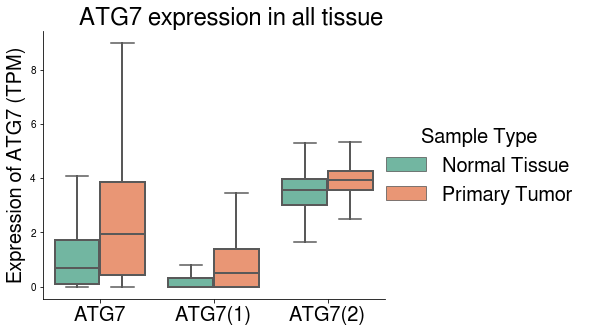

In [26]:
# Distribution: Data preparation + graph

data = [[df_Norm_Prim, 'all tissue']]

for df in data:
   
  shape = df[0].shape
  shape = shape[0]
  print(shape)

  #select the sample type column
  sample_type = {'sample_type':[df[0].iloc[:,1][i]
      for i in range(0, shape)]}

  #convert to df, and copy it 3 times
  sample_typedf = pandas.DataFrame(sample_type)
  sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
  sample_typedf.reset_index(drop=True, inplace=True)

  # Y for expression value 
  y = {'y':[df[0].iloc[:,j][i]
      for j in range(9,12)
        for i in range(0, shape)]}

  #create df with Y 
  data_distrib = pandas.DataFrame(y)

  # X for ATG7/iso1/iso2
  data_distrib['x'] = ''
  data_distrib['x'][: shape] = 'ATG7'
  data_distrib['x'][shape: shape*2] = 'ATG7(1)'
  data_distrib['x'][shape*2:] = 'ATG7(2)'

  # Will be used for Hue
  data_distrib['Sample Type'] = sample_typedf['sample_type']

  #graph
  seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
  
  plt.ylabel('Expression of ATG7 (TPM)')
  plt.xlabel('')
  plt.title('ATG7 expression in '+ df[1], x=.55)

In [27]:
#Distribution: Stats for all 

all_dfs = [[df_ATG7_Normal, 'all normal tissue', df_ATG7_Primary, 'all primary tumors']]

isoforms = ['ATG7', 'ATG7_1', 'ATG7_2']

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


the pvalue between all normal tissue(3.438) and all primary tumors(3.820) for ATG7 is 0.000E+00
the pvalue between all normal tissue(2.616) and all primary tumors(2.778) for ATG7_1 is 1.238E-108
the pvalue between all normal tissue(-0.576) and all primary tumors(0.949) for ATG7_2 is 0.000E+00



### 2) Normalized

16614


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


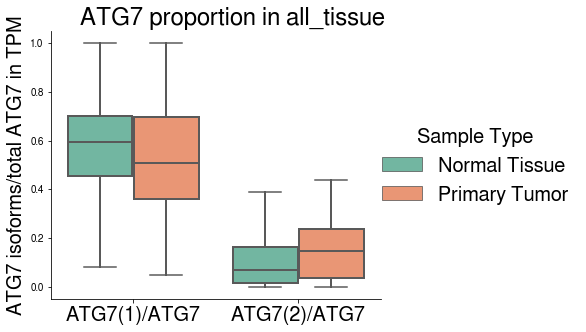

In [28]:
# NORMALiZED Distribution: Data preparation + graph

data = [[df_Norm_Prim, 'all_tissue']]


for df in data:
   
  shape = df[0].shape
  shape = shape[0]
  print(shape)

  #select the sample type column
  sample_type = {'sample_type':[df[0].iloc[:,1][i]
      for i in range(0, shape)]}

  #convert to df, and copy it 3 times
  sample_typedf = pandas.DataFrame(sample_type)
  sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
  sample_typedf.reset_index(drop=True, inplace=True)

  # Y for expression value 
  y = {'y':[df[0].iloc[:,j][i]
      for j in range(18,20)
        for i in range(0, shape)]}

  #create df with Y 
  data_distrib = pandas.DataFrame(y)

  # X for iso1/ATG7 and iso2/ATG7
  data_distrib['x'] = ''
  data_distrib['x'][: shape] = 'ATG7(1)/ATG7'
  data_distrib['x'][shape:] = 'ATG7(2)/ATG7'


  # Will be used for Hue
  data_distrib['Sample Type'] = sample_typedf['sample_type']

  #graph
  seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
  
  plt.ylabel('ATG7 isoforms/total ATG7 in TPM')
  plt.xlabel('')
  plt.title('ATG7 proportion in '+ df[1], x=0.55)


In [29]:
#NORMALIZED Distribution: Stats for all 

all_dfs = [[df_ATG7_Normal, 'all normal tissue', df_ATG7_Primary, 'all primary tumors']]

isoforms = ['ATG7(1)norm', 'ATG7(2)norm']
print('NORMALIZED')

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


NORMALIZED
the pvalue between all normal tissue(0.595) and all primary tumors(0.507) for ATG7(1)norm is 4.743E-53
the pvalue between all normal tissue(0.068) and all primary tumors(0.146) for ATG7(2)norm is 1.615E-186



#IV] Expression correlation 

##1) between the two isoforms

shape: (9185, 20)
shape after removing extrem dots: (9176, 20)
The correlation between iso1 and iso2 in normal tissue is: 0.02366015296692227 0.0414250994345116


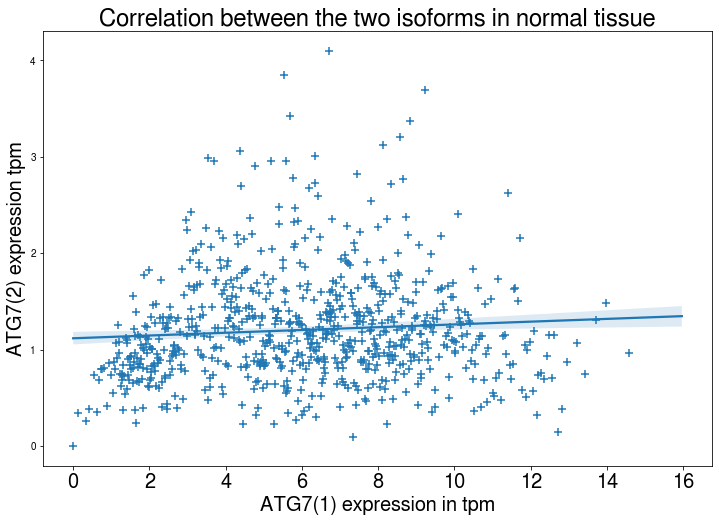


The correlation between iso1 and iso2 in primary tumors is: -0.1894636901702883 6.56308203038513e-75


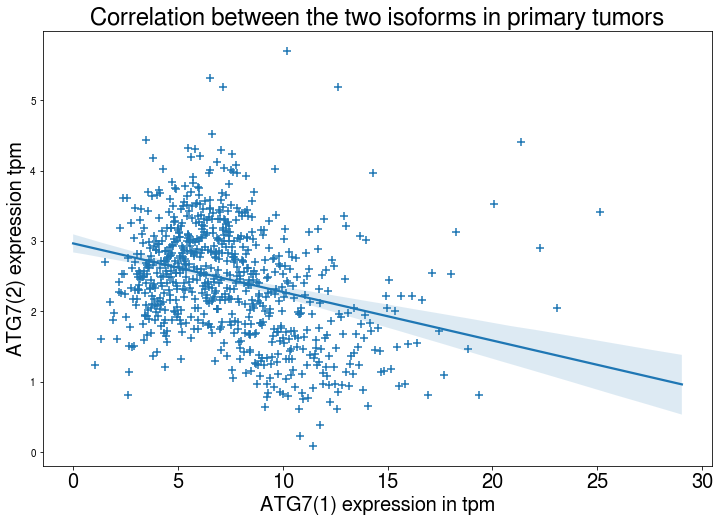

<Figure size 864x576 with 0 Axes>

In [30]:
#isoform correlation in all tissue 

#three values are very high and make my graph ugly... I remove them.
df_ATG7_Primary2 = df_ATG7_Primary[df_ATG7_Primary['ATG7(1)'] < 30 ]
print("shape:",df_ATG7_Primary.shape)
print("shape after removing extrem dots:",df_ATG7_Primary2.shape)


tissues = [[df_ATG7_Normal, "normal tissue"], [df_ATG7_Primary2, "primary tumors"]]

for tissue in tissues: 
  x = tissue[0]['ATG7(1)'].to_list()
  y = tissue[0]['ATG7(2)'].to_list()

  r_value, p_value = scipy.stats.spearmanr(x, y)
  print("The correlation between iso1 and iso2 in",tissue[1],"is:", r_value, p_value)

  seaborn.regplot(x=x,y=y, x_bins=800, x_ci = 0, marker="+")
  name = "Correlation between the two isoforms in "+  tissue[1]
  plt.title(name)
  plt.xlabel("ATG7(1) expression in tpm")
  plt.ylabel('ATG7(2) expression tpm')
  plt.show()
  plt.clf()
  print()


##2) between all protein coding

In [31]:
#to know the ensembl code for HK2
protein_coding_list.loc[protein_coding_list['hgnc_symbol'] == 'MFAP3']

,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
19160,ENSG00000037749,MFAP3,4238.0,protein_coding


In [32]:
# Spearman Correlation, main genes 

all_tissue_used = [[normal_protcoding_atg7_expr,'Normal Tissue'], [primary_protcoding_atg7_expr,'Primary Tumors']]

HK2 = 'ENSG00000159399'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
ATG7_1 = 'ATG7_1'
ATG7_2 = 'ATG7_2'
MTDH = 'ENSG00000147649'
MAPK1 = 'ENSG00000100030'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'

for tissue in all_tissue_used:
  genes_x = [[KPNA1,'KPNA1'], [MAPK1, 'MAPK1'], [TNPO1,'TNPO1'], [MTDH,'MTDH'], 
             [HK2, "HK2"], [YAP1, 'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], 
             [TGFB1,'TGFB1'], [ATG7_1,'ATG7_1'], [ATG7_2,'ATG7_2']]

  print(tissue[1])

  for gene in genes_x:
    x = tissue[0][gene[0]].to_list()
    y = tissue[0]['ATG7'].to_list()
    y1 = tissue[0]['ATG7_1'].to_list()
    y2 = tissue[0]['ATG7_2'].to_list()  
  
    r_value, p_value = scipy.stats.spearmanr(x, y)
    print('  correlation between ATG7 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
    r_value, p_value = scipy.stats.spearmanr(x, y1)
    print('  correlation between ATG7_1 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
    r_value, p_value = scipy.stats.spearmanr(x, y2)
    print('  correlation between ATG7_2 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
    print()

Normal Tissue
  correlation between ATG7 and KPNA1 is: r_value = 0.52 for a p_value of 0.00e+00
  correlation between ATG7_1 and KPNA1 is: r_value = 0.32 for a p_value of 2.82e-172
  correlation between ATG7_2 and KPNA1 is: r_value = 0.44 for a p_value of 0.00e+00

  correlation between ATG7 and MAPK1 is: r_value = 0.56 for a p_value of 0.00e+00
  correlation between ATG7_1 and MAPK1 is: r_value = 0.35 for a p_value of 3.72e-211
  correlation between ATG7_2 and MAPK1 is: r_value = 0.45 for a p_value of 0.00e+00

  correlation between ATG7 and TNPO1 is: r_value = 0.53 for a p_value of 0.00e+00
  correlation between ATG7_1 and TNPO1 is: r_value = 0.46 for a p_value of 0.00e+00
  correlation between ATG7_2 and TNPO1 is: r_value = 0.25 for a p_value of 2.74e-107

  correlation between ATG7 and MTDH is: r_value = 0.50 for a p_value of 0.00e+00
  correlation between ATG7_1 and MTDH is: r_value = 0.40 for a p_value of 2.52e-277
  correlation between ATG7_2 and MTDH is: r_value = 0.30 for a p_

In [33]:
%%time
# Spearman Correlation, all genes
all_tissue_used = [[normal_protcoding_atg7_expr,'Normal Tissues'], [primary_protcoding_atg7_expr,'Primary Tumors']]

isoforms = ['ATG7_1', 'ATG7_2']

all_positiv_corr_spearman = []

for tissue in all_tissue_used:
  print(tissue[1], tissue[0].shape)

  #create a new row with max() for each gene and transpose
  tissue[0].loc['max()'] = tissue[0].max()
  tissue[0] = tissue[0].T

  #select all row where max() > 2.3 (= 5 tpm)
  nb_before = tissue[0]['max()'].count()
  tissue[0] = tissue[0].drop(tissue[0].index[0:2])
  tissue[0] = tissue[0][tissue[0]['max()'] > 2.3]
  nb_after = tissue[0]['max()'].count()
  print("number of genes removed:", nb_before-nb_after)
  print('the minimum of TPM is', tissue[0]['max()'].min())
  
  #delete the column max() and tranpose back
  tissue[0] =  tissue[0].drop('max()', axis = 1) 
  tissue[0] = tissue[0].T
  print('nombre genes after removing < 4tpm', tissue[0].shape)

  for isoform in isoforms:

    genepos = []
    geneneg = []
    rvaluepos = []
    rvalueneg = []
    pvaluepos = []
    pvalueneg = []

    print(isoform)
    x = tissue[0][isoform].to_list()
    genes = tissue[0].columns[3:]

    for gene in genes:
      y = tissue[0][gene].to_list()
      r_value, p_value = scipy.stats.spearmanr(x, y)

      if r_value > 0.65:
        genepos.append(gene)
        rvaluepos.append(r_value)
        pvaluepos.append(p_value)
        
      elif r_value < -0.65:
        geneneg.append(gene)
        rvalueneg.append(r_value)
        pvalueneg.append(p_value)

    #create a dictionnary
    d = dict(ensembl_gene_id= genepos, r_value=rvaluepos,  p_value=pvaluepos)
    d2 = dict(Gene= geneneg, r_value=rvalueneg,  p_value=pvalueneg)

    #Convert to dataframe
    positiv_corr = 'pos_corr_'+tissue[1]
    negativ_corr = 'neg_corr_'+tissue[1]

    df_positiv_corr = pandas.DataFrame.from_dict(d, orient='index')
    df_negativ_corr = pandas.DataFrame.from_dict(data=d2, orient='index')

    #Transpose to have a better table
    df_positiv_corr = df_positiv_corr.transpose()
    df_negativ_corr = df_negativ_corr.transpose()

    #name
    positiv_corr = 'pos_spearman_corr_'+tissue[1]+'_'+isoform
    negativ_corr = 'neg_spearman_corr_'+tissue[1]+'_'+isoform

    print(positiv_corr, df_positiv_corr.shape)
    print(negativ_corr, df_negativ_corr.shape)

    #scending orde, save to excel
    df_positiv_corr['info'] = tissue[1]+'_'+isoform
    df_positiv_corr = protein_coding_list.merge(df_positiv_corr)
    df_positiv_corr = df_positiv_corr.drop(['entrezgene_id', 'transcript_biotype'], axis = 1)

    df_positiv_corr = df_positiv_corr.sort_values(['r_value'], ascending = False)

    df_positiv_corr.to_excel(positiv_corr+'.xlsx', index=False)
    df_negativ_corr.to_excel(negativ_corr+'.xlsx', index=False)

    all_positiv_corr_spearman.append(df_positiv_corr)
  print()

Normal Tissues (7429, 19387)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':


number of genes removed: 943
the minimum of TPM is 2.3019
nombre genes after removing < 4tpm (7429, 18443)
ATG7_1
pos_spearman_corr_Normal Tissues_ATG7_1 (1378, 3)
neg_spearman_corr_Normal Tissues_ATG7_1 (0, 3)
ATG7_2
pos_spearman_corr_Normal Tissues_ATG7_2 (0, 3)
neg_spearman_corr_Normal Tissues_ATG7_2 (0, 3)

Primary Tumors (9185, 19387)
number of genes removed: 841
the minimum of TPM is 2.3048
nombre genes after removing < 4tpm (9185, 18546)
ATG7_1
pos_spearman_corr_Primary Tumors_ATG7_1 (0, 3)
neg_spearman_corr_Primary Tumors_ATG7_1 (0, 3)
ATG7_2
pos_spearman_corr_Primary Tumors_ATG7_2 (15, 3)
neg_spearman_corr_Primary Tumors_ATG7_2 (0, 3)



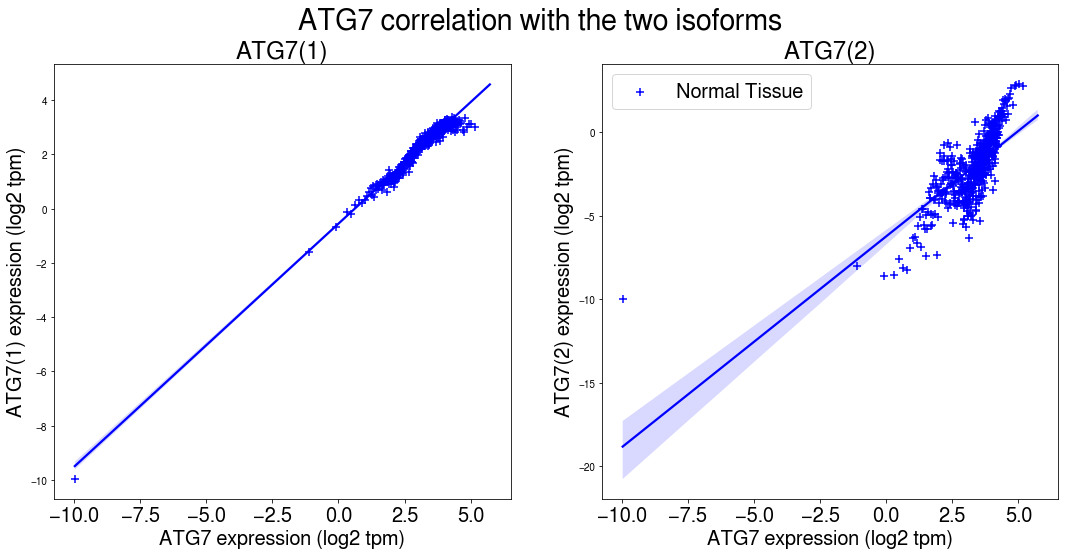

Normal Tissue
  correlation between ATG7_1 and ATG7 is: r_value = 0.79 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7 is: r_value = 0.51 for a p_value of 0.00e+00



<Figure size 864x576 with 0 Axes>

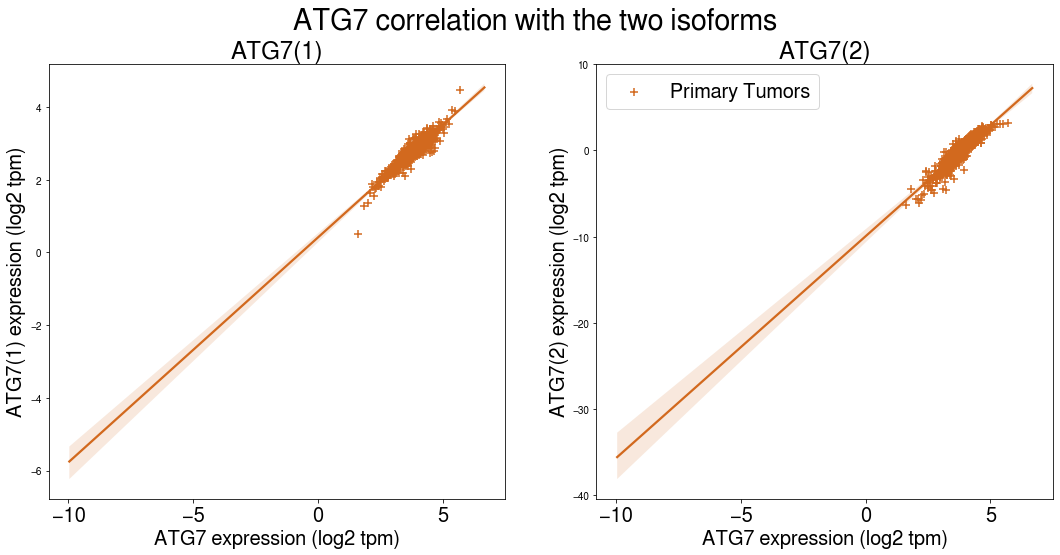

Primary Tumors
  correlation between ATG7_1 and ATG7 is: r_value = 0.50 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7 is: r_value = 0.65 for a p_value of 0.00e+00



<Figure size 864x576 with 0 Axes>

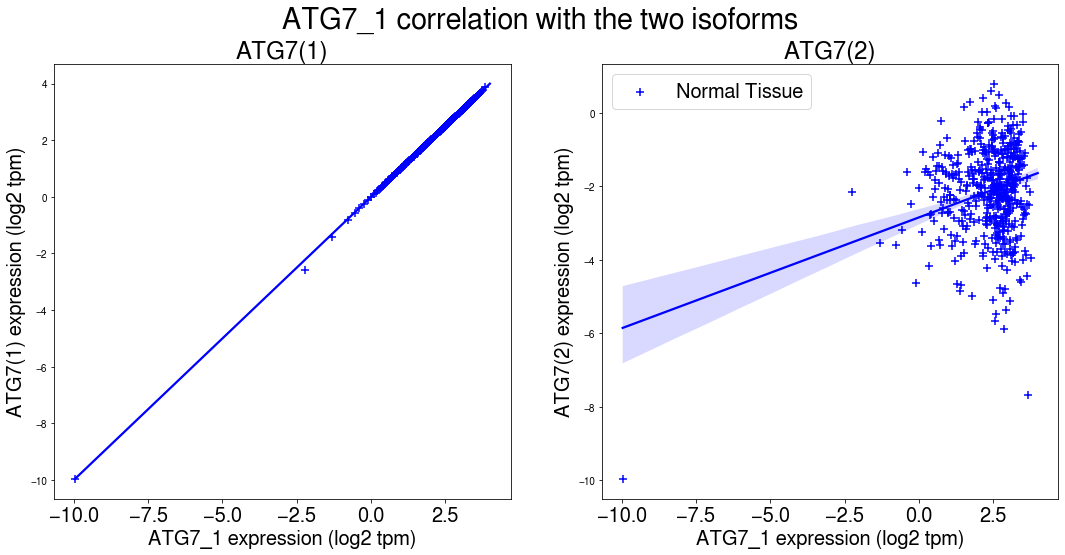

Normal Tissue
  correlation between ATG7_1 and ATG7_1 is: r_value = 1.00 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7_1 is: r_value = 0.02 for a p_value of 3.81e-02



<Figure size 864x576 with 0 Axes>

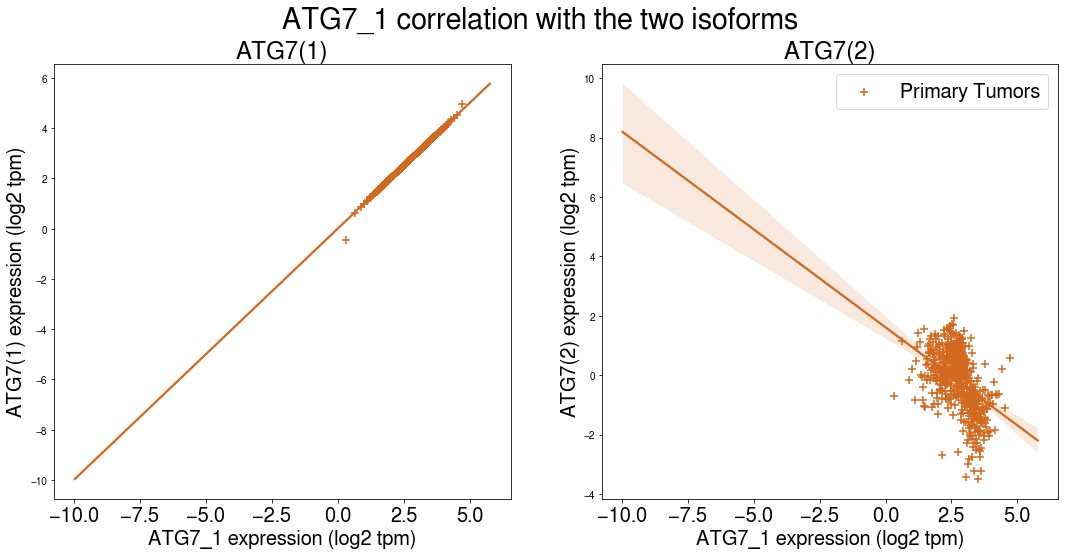

Primary Tumors
  correlation between ATG7_1 and ATG7_1 is: r_value = 1.00 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7_1 is: r_value = -0.19 for a p_value of 4.65e-74



<Figure size 864x576 with 0 Axes>

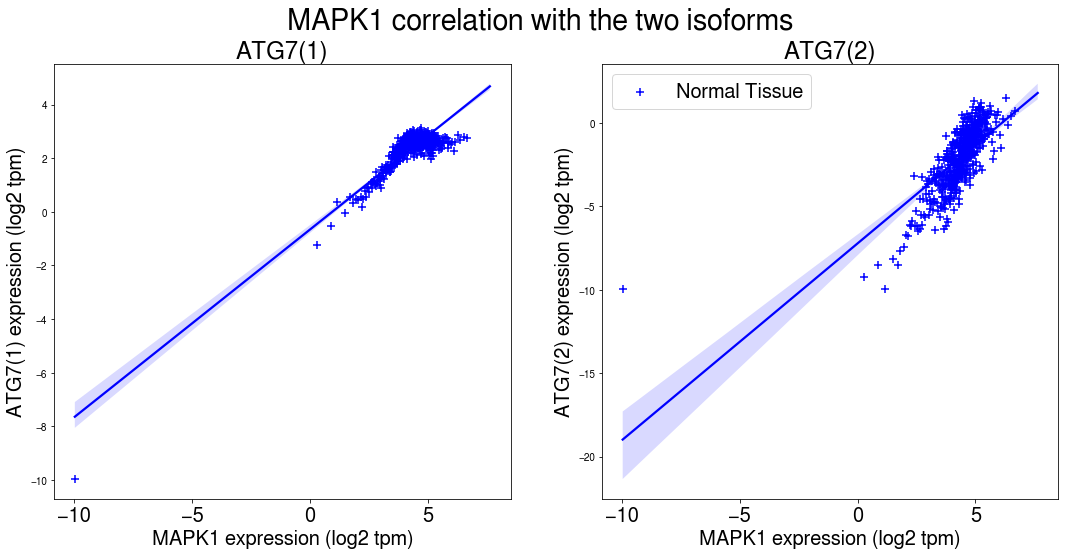

Normal Tissue
  correlation between ATG7_1 and MAPK1 is: r_value = 0.35 for a p_value of 1.61e-211
  correlation between ATG7_2 and MAPK1 is: r_value = 0.45 for a p_value of 0.00e+00



<Figure size 864x576 with 0 Axes>

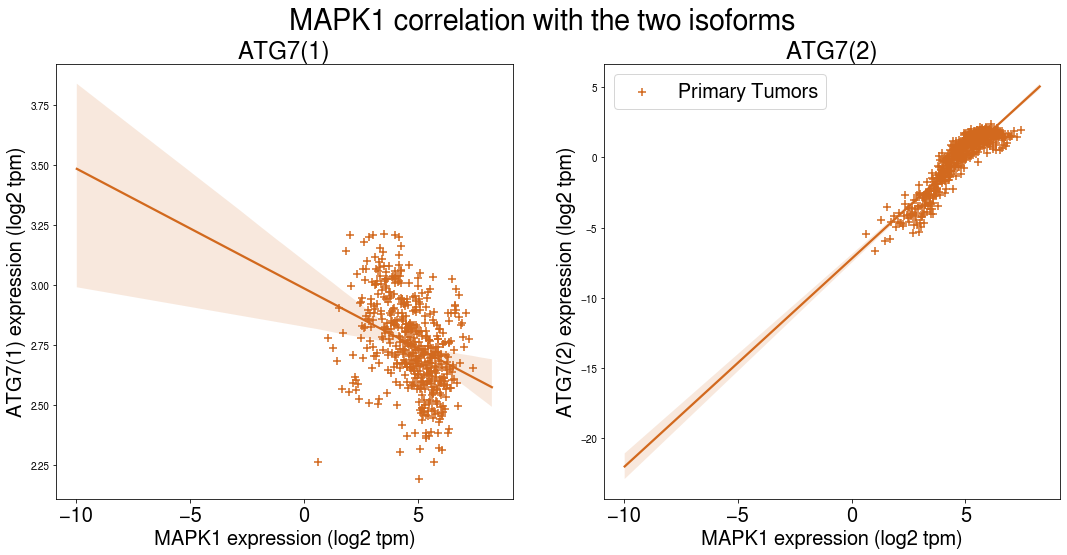

Primary Tumors
  correlation between ATG7_1 and MAPK1 is: r_value = -0.13 for a p_value of 5.90e-38
  correlation between ATG7_2 and MAPK1 is: r_value = 0.63 for a p_value of 0.00e+00



<Figure size 864x576 with 0 Axes>

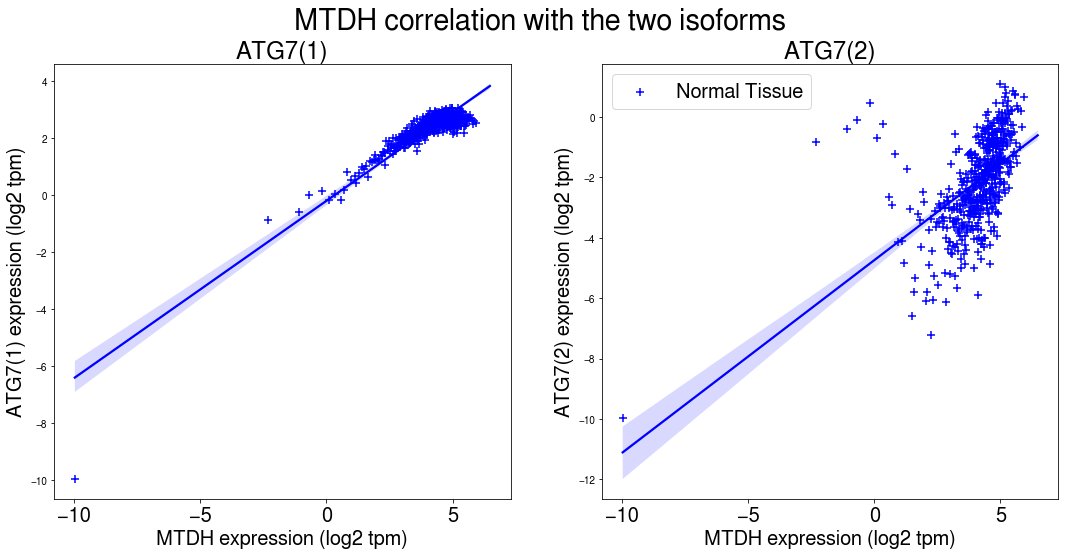

Normal Tissue
  correlation between ATG7_1 and MTDH is: r_value = 0.40 for a p_value of 9.88e-278
  correlation between ATG7_2 and MTDH is: r_value = 0.30 for a p_value of 2.19e-150



<Figure size 864x576 with 0 Axes>

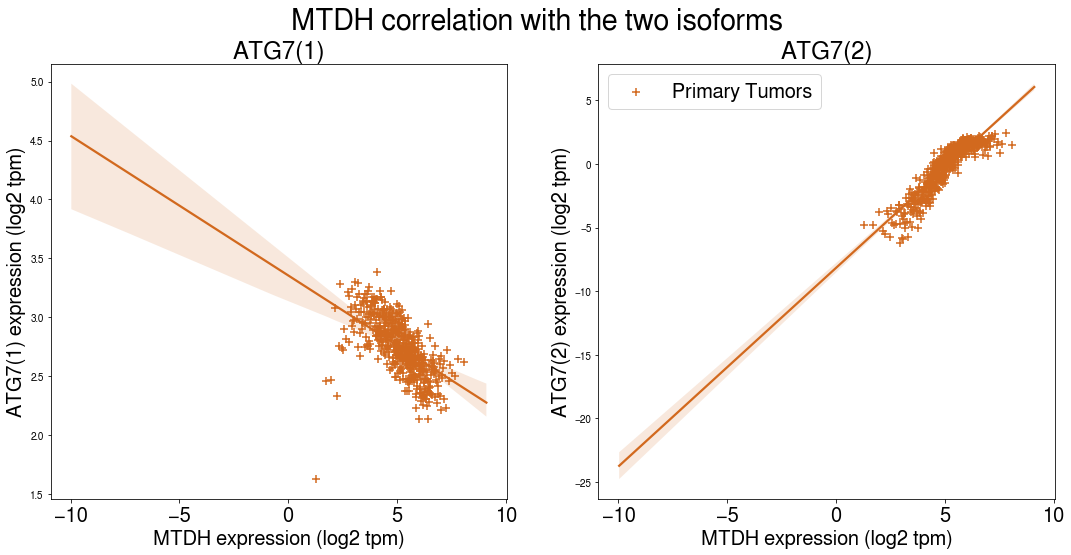

Primary Tumors
  correlation between ATG7_1 and MTDH is: r_value = -0.27 for a p_value of 5.09e-155
  correlation between ATG7_2 and MTDH is: r_value = 0.63 for a p_value of 0.00e+00



<Figure size 864x576 with 0 Axes>

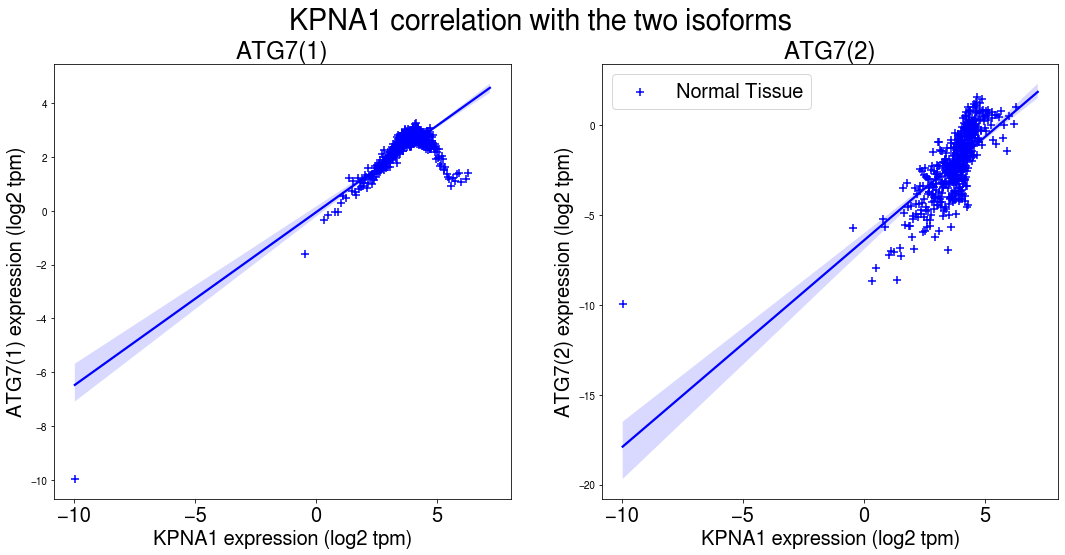

Normal Tissue
  correlation between ATG7_1 and KPNA1 is: r_value = 0.32 for a p_value of 1.30e-172
  correlation between ATG7_2 and KPNA1 is: r_value = 0.44 for a p_value of 0.00e+00



<Figure size 864x576 with 0 Axes>

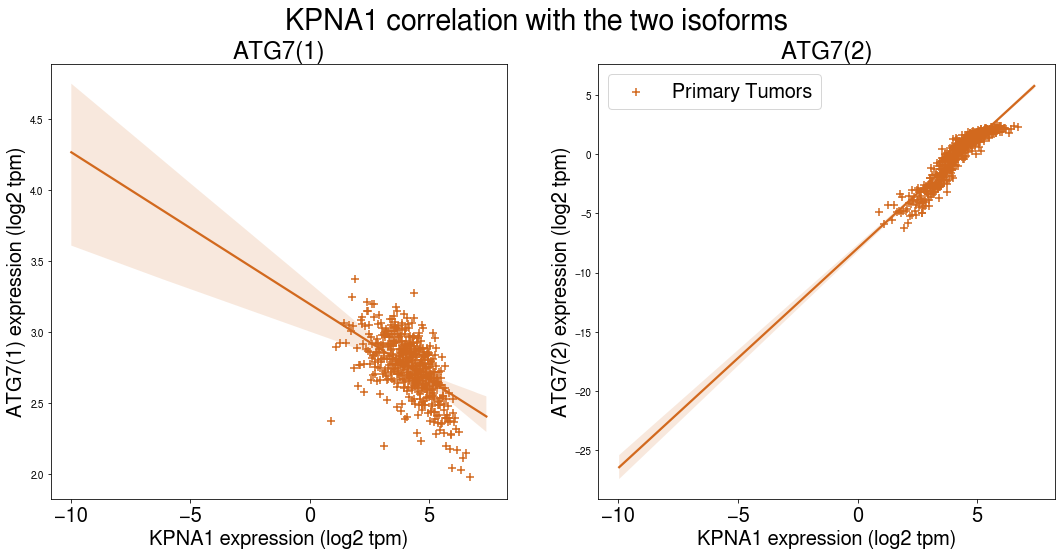

Primary Tumors
  correlation between ATG7_1 and KPNA1 is: r_value = -0.19 for a p_value of 1.08e-74
  correlation between ATG7_2 and KPNA1 is: r_value = 0.68 for a p_value of 0.00e+00



<Figure size 864x576 with 0 Axes>

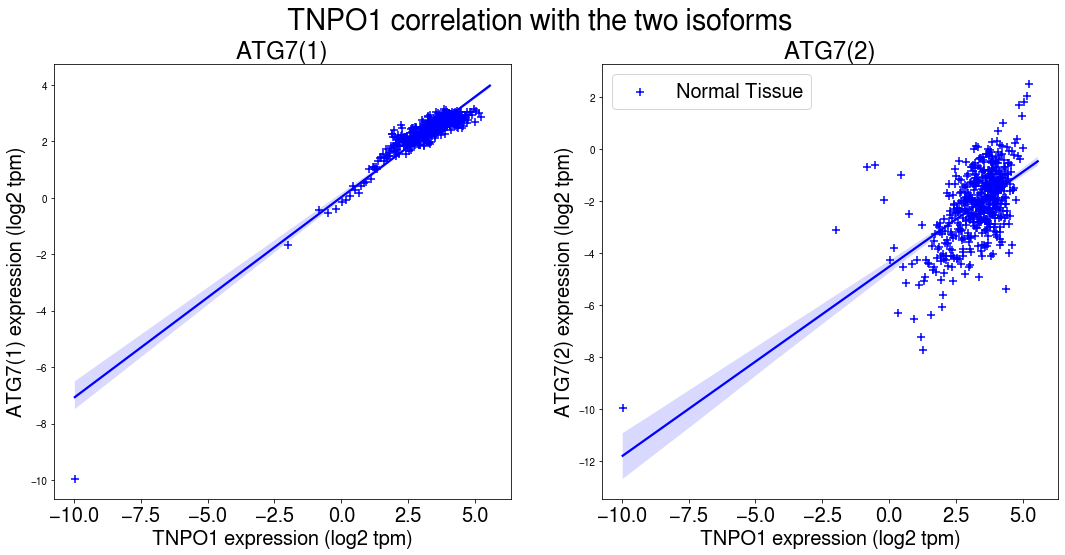

Normal Tissue
  correlation between ATG7_1 and TNPO1 is: r_value = 0.46 for a p_value of 0.00e+00
  correlation between ATG7_2 and TNPO1 is: r_value = 0.25 for a p_value of 1.45e-107



<Figure size 864x576 with 0 Axes>

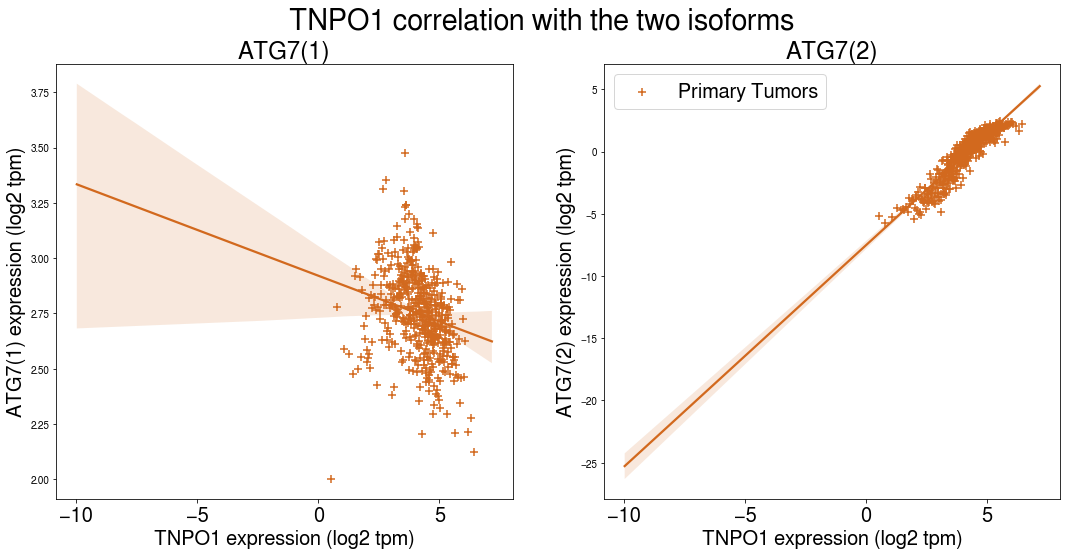

Primary Tumors
  correlation between ATG7_1 and TNPO1 is: r_value = -0.11 for a p_value of 2.87e-28
  correlation between ATG7_2 and TNPO1 is: r_value = 0.63 for a p_value of 0.00e+00



<Figure size 864x576 with 0 Axes>

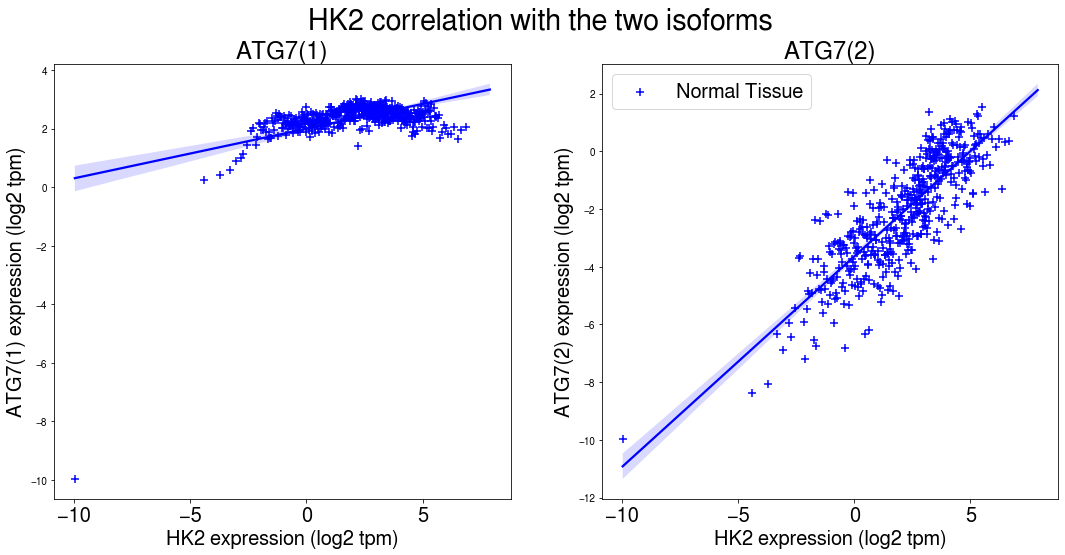

Normal Tissue
  correlation between ATG7_1 and HK2 is: r_value = 0.14 for a p_value of 2.23e-33
  correlation between ATG7_2 and HK2 is: r_value = 0.47 for a p_value of 0.00e+00



<Figure size 864x576 with 0 Axes>

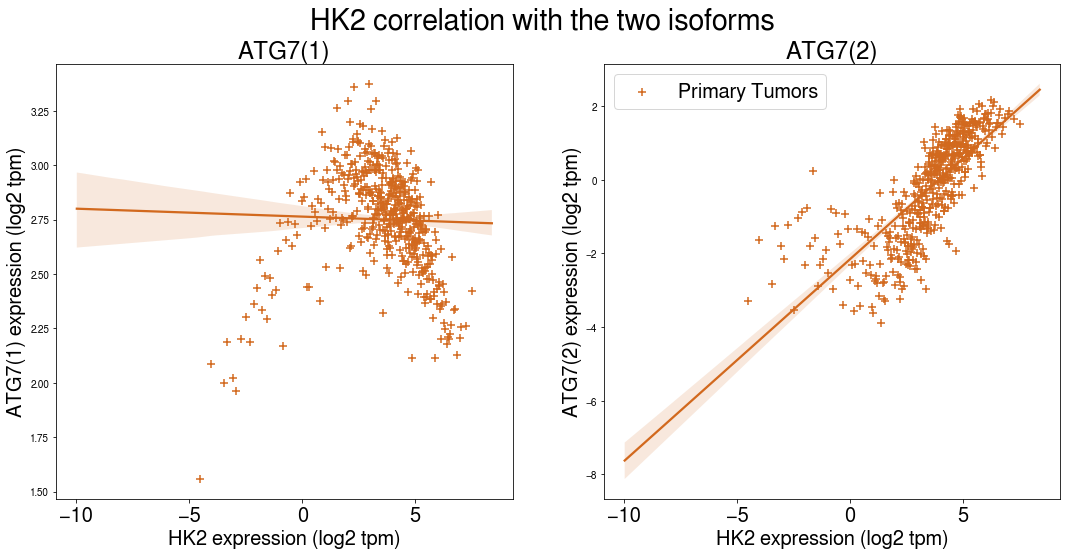

Primary Tumors
  correlation between ATG7_1 and HK2 is: r_value = -0.12 for a p_value of 3.72e-30
  correlation between ATG7_2 and HK2 is: r_value = 0.43 for a p_value of 0.00e+00



<Figure size 864x576 with 0 Axes>

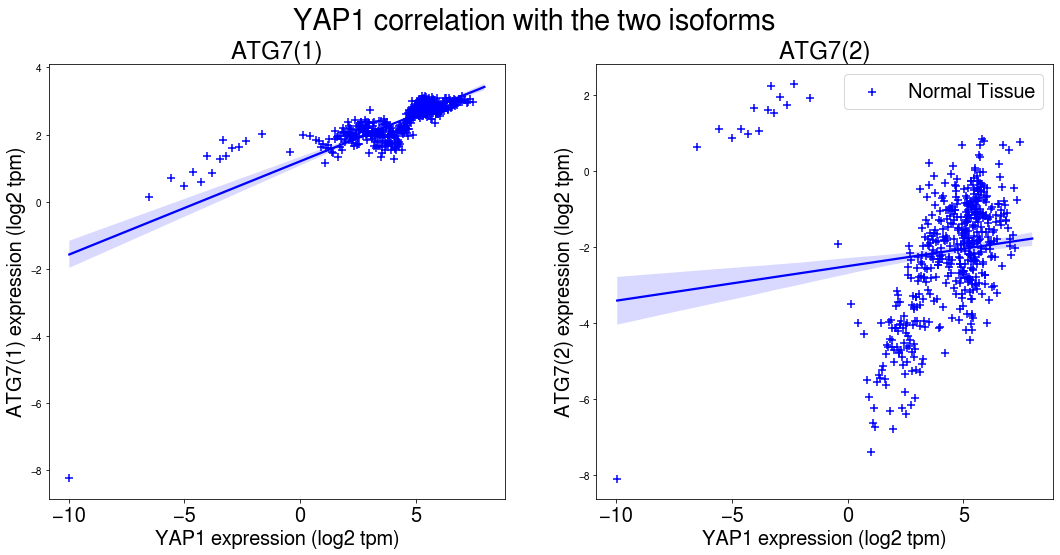

Normal Tissue
  correlation between ATG7_1 and YAP1 is: r_value = 0.48 for a p_value of 0.00e+00
  correlation between ATG7_2 and YAP1 is: r_value = 0.20 for a p_value of 1.32e-70



<Figure size 864x576 with 0 Axes>

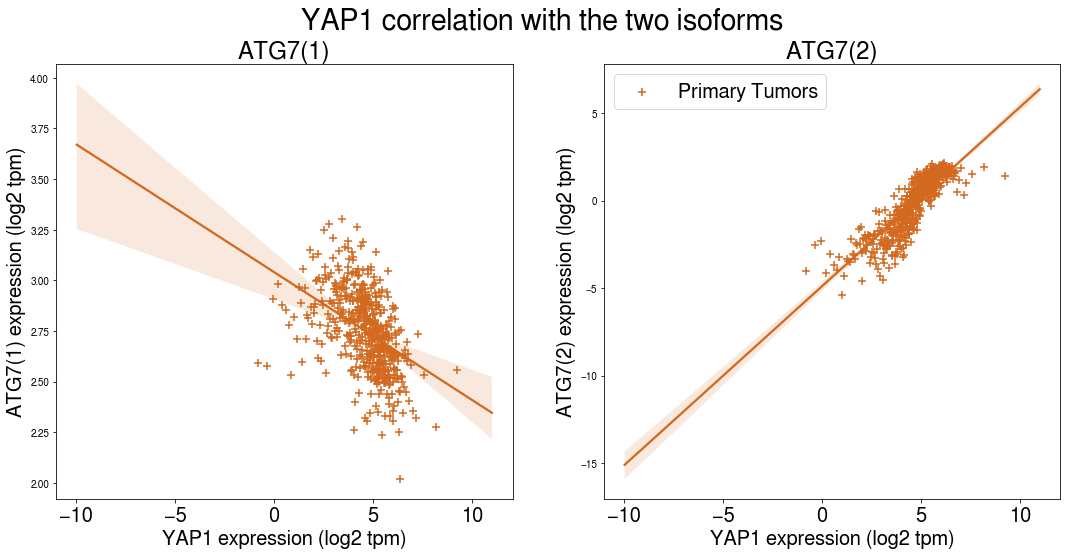

Primary Tumors
  correlation between ATG7_1 and YAP1 is: r_value = -0.18 for a p_value of 2.72e-68
  correlation between ATG7_2 and YAP1 is: r_value = 0.50 for a p_value of 0.00e+00



<Figure size 864x576 with 0 Axes>

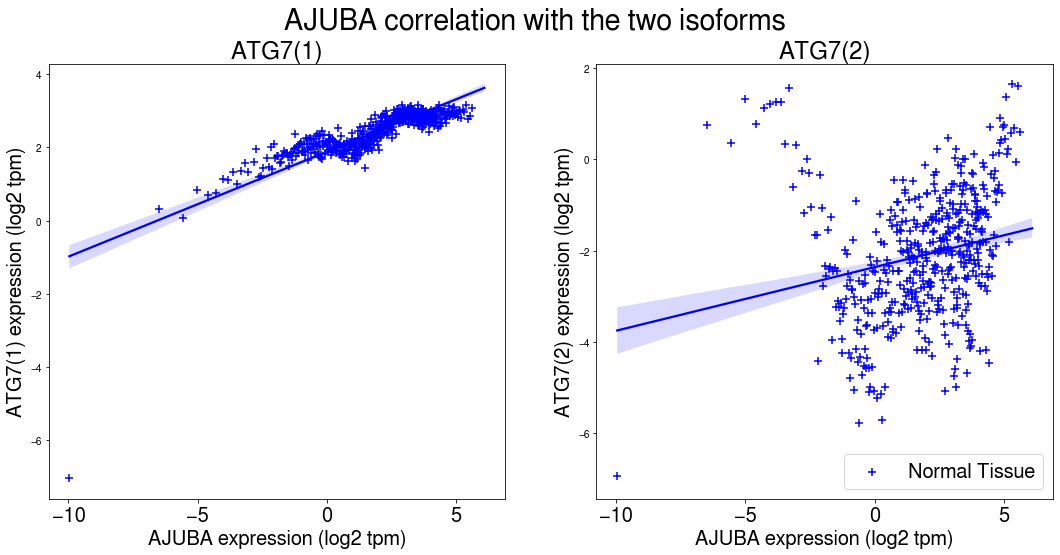

Normal Tissue
  correlation between ATG7_1 and AJUBA is: r_value = 0.53 for a p_value of 0.00e+00
  correlation between ATG7_2 and AJUBA is: r_value = 0.17 for a p_value of 1.45e-46



<Figure size 864x576 with 0 Axes>

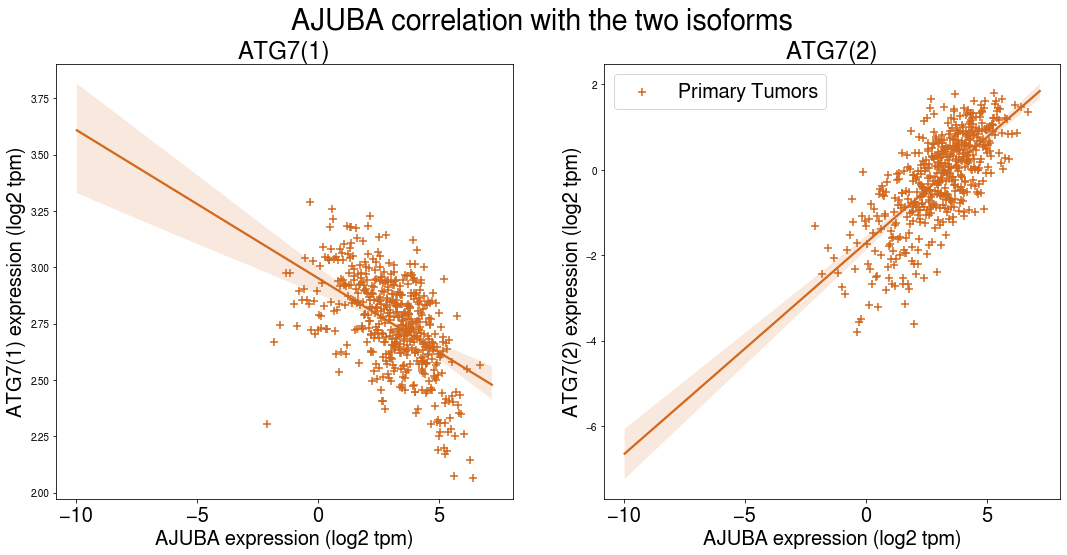

Primary Tumors
  correlation between ATG7_1 and AJUBA is: r_value = -0.18 for a p_value of 8.13e-70
  correlation between ATG7_2 and AJUBA is: r_value = 0.25 for a p_value of 1.27e-130



<Figure size 864x576 with 0 Axes>

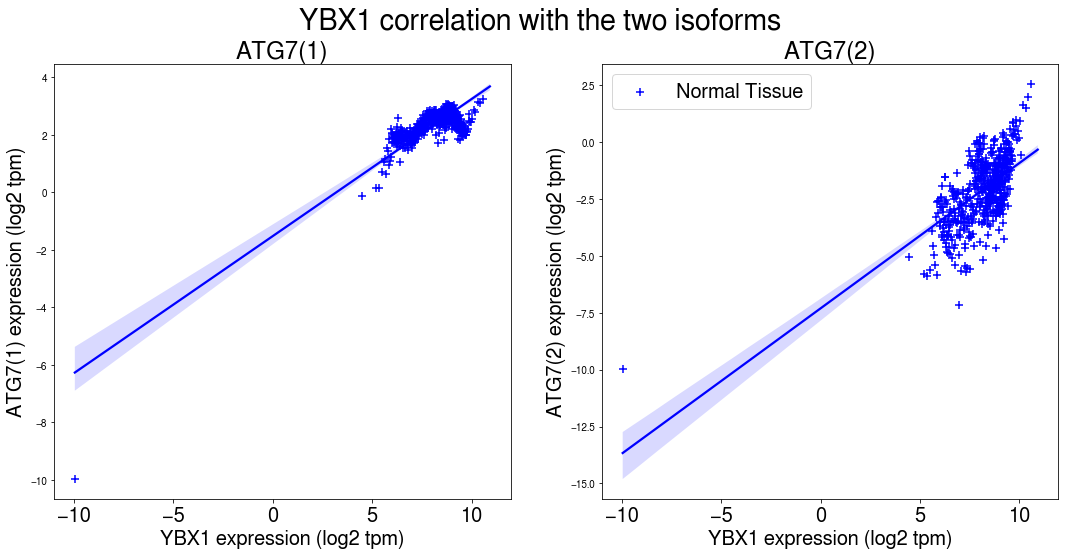

Normal Tissue
  correlation between ATG7_1 and YBX1 is: r_value = 0.26 for a p_value of 1.26e-119
  correlation between ATG7_2 and YBX1 is: r_value = 0.26 for a p_value of 3.23e-112



<Figure size 864x576 with 0 Axes>

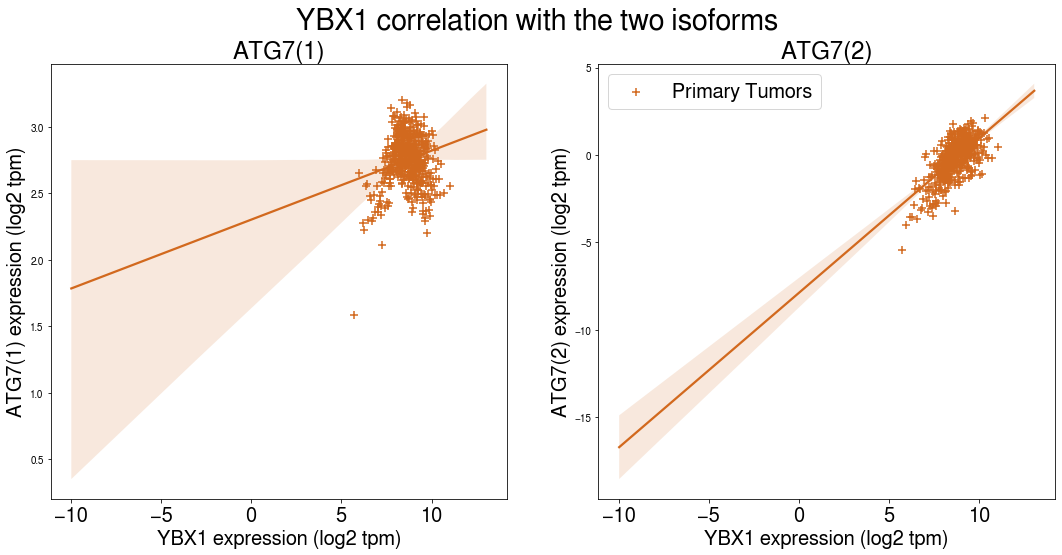

Primary Tumors
  correlation between ATG7_1 and YBX1 is: r_value = -0.03 for a p_value of 1.26e-02
  correlation between ATG7_2 and YBX1 is: r_value = 0.23 for a p_value of 4.47e-112



<Figure size 864x576 with 0 Axes>

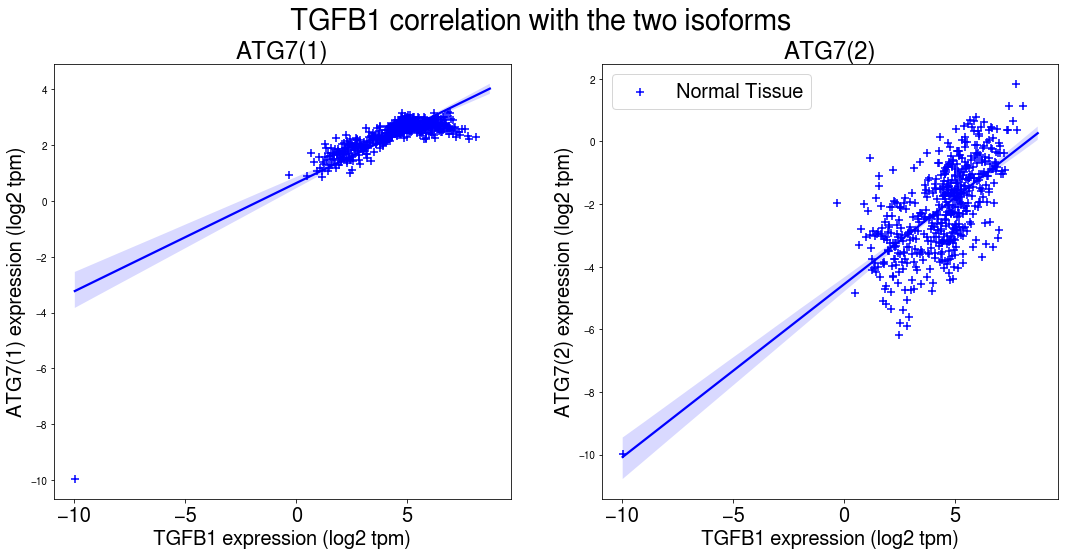

Normal Tissue
  correlation between ATG7_1 and TGFB1 is: r_value = 0.41 for a p_value of 1.46e-303
  correlation between ATG7_2 and TGFB1 is: r_value = 0.30 for a p_value of 2.87e-152



<Figure size 864x576 with 0 Axes>

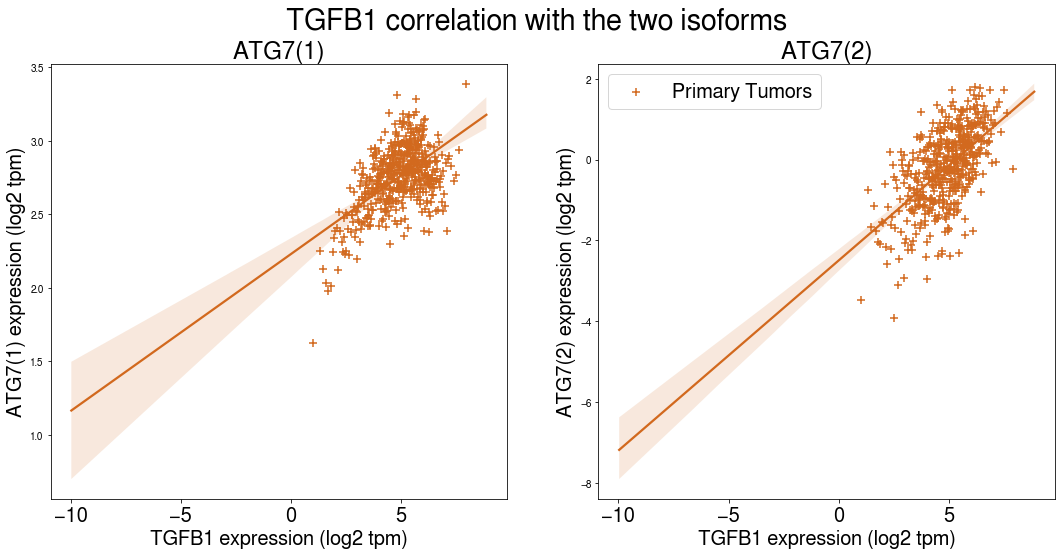

Primary Tumors
  correlation between ATG7_1 and TGFB1 is: r_value = 0.14 for a p_value of 8.67e-41
  correlation between ATG7_2 and TGFB1 is: r_value = 0.19 for a p_value of 2.19e-76



<Figure size 864x576 with 0 Axes>

In [34]:
%%time
#Graphic representation, two graphs in one

all_tissue_used = [[normal_protcoding_atg7_expr,'Normal Tissue', 'blue'], 
                   [primary_protcoding_atg7_expr,'Primary Tumors', 'chocolate']]

HK2 = 'ENSG00000159399'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
MAPK1 = 'ENSG00000100030'
MTDH = 'ENSG00000147649'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'
ATG7 = 'ATG7'

 
genes = [[ATG7,'ATG7'], [ATG7_1,'ATG7_1'], [MAPK1,'MAPK1'], [MTDH,'MTDH'], [KPNA1,'KPNA1'], 
         [TNPO1,'TNPO1'], [HK2,'HK2'], [YAP1,'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], [TGFB1,'TGFB1']]

for gene in genes:
  for df in all_tissue_used:
    
      fig, ax = plt.subplots(1,2, figsize=(18,8))
      name = gene[1]+ " correlation with the two isoforms"
      name2 = gene[1]+ " expression (log2 tpm)"

      fig.suptitle(name, fontsize="x-large")

      x = df[0][gene[0]].to_list()
      y1 = df[0]['ATG7_1'].to_list()
      y2 = df[0]['ATG7_2'].to_list()


      fig = seaborn.regplot(x=x,y=y1, ax=ax[0], x_bins=500, x_ci = 0, marker="+", label = df[1], color = df[2])
      fig.set_title("ATG7(1)")
      fig.set_xlabel(name2)
      fig.set_ylabel('ATG7(1) expression (log2 tpm)')

      fig = seaborn.regplot(x=x,y=y2, ax=ax[1], x_bins=500, x_ci = 0, marker="+", label = df[1], color = df[2])
      fig.set_title("ATG7(2)")
      fig.set_xlabel(name2)
      fig.set_ylabel('ATG7(2) expression (log2 tpm)')
      plt.legend()
      plt.show()
      plt.clf()

      print(df[1])
      r_value, p_value = scipy.stats.spearmanr(x, y1)
      print('  correlation between ATG7_1 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
      r_value, p_value = scipy.stats.spearmanr(x, y2)
      print('  correlation between ATG7_2 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
      print()

#V] Venn diagrams

In [35]:
len(all_positiv_corr_spearman)

4

In [36]:
all_positiv_corr_spearman[0].head()

,ensembl_gene_id,hgnc_symbol,r_value,p_value,info
1355,ENSG00000121775,TMEM39B,0.787757,0.0,Normal Tissues_ATG7_1
1065,ENSG00000230124,ACBD6,0.786925,0.0,Normal Tissues_ATG7_1
1064,ENSG00000230124,ACBD6,0.786925,0.0,Normal Tissues_ATG7_1
245,ENSG00000197548,ATG7,0.785379,0.0,Normal Tissues_ATG7_1
782,ENSG00000266173,STRADA,0.784712,0.0,Normal Tissues_ATG7_1


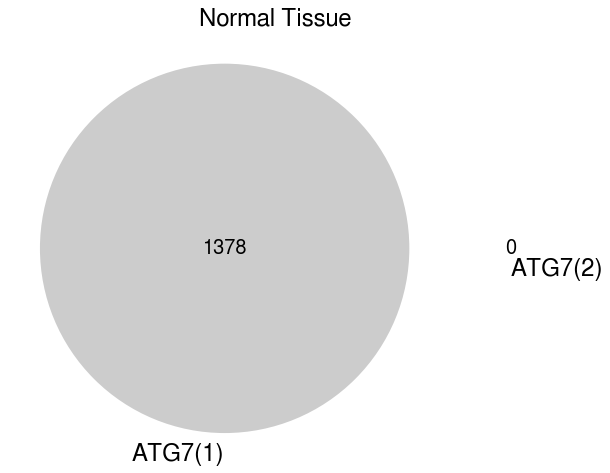

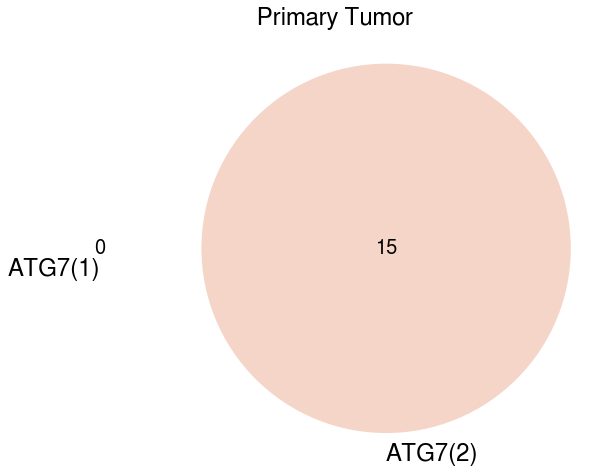

<Figure size 864x576 with 0 Axes>

In [37]:
#VENN DIAGRAMS

data =  [
         [all_positiv_corr_spearman[0], all_positiv_corr_spearman[1], 'Normal Tissue'], 
         [all_positiv_corr_spearman[2], all_positiv_corr_spearman[3], 'Primary Tumor']
         ]

intersection_list = []

for dfs in data:
  set1 = set(dfs[0]['hgnc_symbol'])
  set2 = set(dfs[1]['hgnc_symbol'])
  subset = (set1, set2)

  venn2(subset, set_labels=('ATG7(1)', 'ATG7(2)'), set_colors=('grey', 'darksalmon'))
  label_title = dfs[2]
  plt.title(label_title)
  plt.show()
  plt.clf()
  print()
  inter = set1.intersection(set2)
  intersection_list.append(inter)


communal_corr_genes_Normal = intersection_list[0]
communal_corr_genes_Primary = intersection_list[1]